In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# **1. Load the MNIST dataset:**

In [3]:
(x_train, y_train),  (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

Le set d'entrainement est un tensor contenant 60 000 images de dimension 28x28

In [5]:
y_train.shape

(60000,)

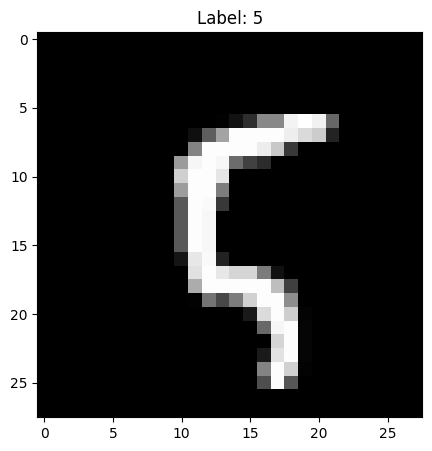

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[100], cmap='gray')
plt.title(f"Label: {y_train[100]}")
plt.show()

# **2. Preprocess the data for a Fully Connected Neural Network:**

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
def preprocess(x, y):
  x_flat = x.reshape(x.shape[0], 28 * 28)
  x_flat = x_flat.astype(np.float32) / 255.0
  y_oh = keras.utils.to_categorical(y, 10)
  return x_flat, y_oh

In [9]:
x_train_flat, y_train_oh = preprocess(x_train, y_train)
x_test_flat, y_test_oh = preprocess(x_test, y_test)

# **3. Build and train a Fully Connected Neural Network:**

In [10]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape = (784,)),
    keras.layers.Dense(128,  activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ["accuracy"]
)

In [12]:
history = model.fit(
    x_train_flat,
    y_train_oh,
    epochs = 10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8938 - loss: 0.3536
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9701 - loss: 0.0936
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0531
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9872 - loss: 0.0387
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9889 - loss: 0.0307
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9928 - loss: 0.0234
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9916 - loss: 0.0256
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9941 - loss: 0.0178
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9943 - loss: 0.0169
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9960 - loss: 0.0122


In [13]:
model.evaluate(x_test_flat, y_test_oh)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.1030


[0.08374987542629242, 0.9815000295639038]

Le modèle apprend efficacement dès les premières itérations, avec d’excellents résultats obtenus dès la deuxième époque. Il montre également une bonne capacité de généralisation sur les données de test.

# **4. Preprocess the data for a Convolutional Neural Network:**

In [29]:
def preprocess_cnn(x, y):
  x_flat = x.reshape(-1, x.shape[1], x.shape[2], 1)
  x_flat = x_flat.astype(np.float32) / 255.0
  y_oh = keras.utils.to_categorical(y, 10)
  return x_flat, y_oh

In [30]:
x_train_cnn, y_train_cnn = preprocess_cnn(x_train, y_train)
x_test_cnn, y_test_cnn = preprocess_cnn(x_test, y_test)

# **5. Build and train a Convolutional Neural Network:**



In [31]:
cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1), padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
cnn.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ["accuracy"]
)

In [33]:
history2 = cnn.fit(
    x_train_cnn,
    y_train_cnn,
    epochs = 10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9106 - loss: 0.2942
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9868 - loss: 0.0420
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9909 - loss: 0.0286
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9950 - loss: 0.0167
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9960 - loss: 0.0139
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9967 - loss: 0.0105
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9973 - loss: 0.0077
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 25ms/step - accuracy: 0.9981 - loss: 0.0062
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9978 - loss: 0.0067
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9984 - loss: 0.0044


# **6. Compare the performance:**

In [36]:
cnn.evaluate(x_test_cnn, y_test_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9874 - loss: 0.0539


[0.04117271304130554, 0.9904000163078308]

Le modèle Fully Connected atteint une précision de 97,81 % sur le test, ce qui reste satisfaisant. Cependant, le CNN obtient une précision supérieure de 98,74 % avec une perte plus faible, confirmant sa capacité à mieux généraliser. Grâce à ses couches de convolution et de pooling, le CNN extrait plus efficacement les motifs visuels importants, ce qui en fait un modèle plus adapté pour la classification d’images comme celles du dataset MNIST.